# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy
from scipy.stats import ttest_1samp

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents. 

In [2]:
data = pd.read_csv("Current_Employee_Names__Salaries__and_Position_Titles.csv")

# I convert to snake_case
data.columns = map(lambda x:re.sub(r"([a-z]{1})([A-Z]{1})", r"\1 \2",x),data.columns)
data.columns = list(map(lambda x: x.lower(), data.columns))
data.columns = data.columns.str.replace(' ','_')

Examine the `salaries` dataset using the `head` function below.

In [3]:
data.head()

,name,job_titles,department,full_or_part-time,salary_or_hourly,typical_hours,annual_salary,hourly_rate
0,"ADRIANO, RACQUEL ANNE",PARAMEDIC,FIRE,F,Salary,NaN,72510.0,NaN
1,"AFFANEH, MAHIR A",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN
2,"AFOENYI, PHYLLIS",TITLE V PROGRAM TRAINEE I,FAMILY & SUPPORT,P,Hourly,20.0,NaN,13.0
3,"AGAR, BULENT B",DEPUTY COMMISSIONER,WATER MGMNT,F,Salary,NaN,132972.0,NaN
4,"AGEE, LAWRENCE",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [4]:
data.isnull().sum()

name                     0
job_titles               0
department               0
full_or_part-time        0
salary_or_hourly         0
typical_hours        25528
annual_salary         8174
hourly_rate          25528
dtype: int64

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

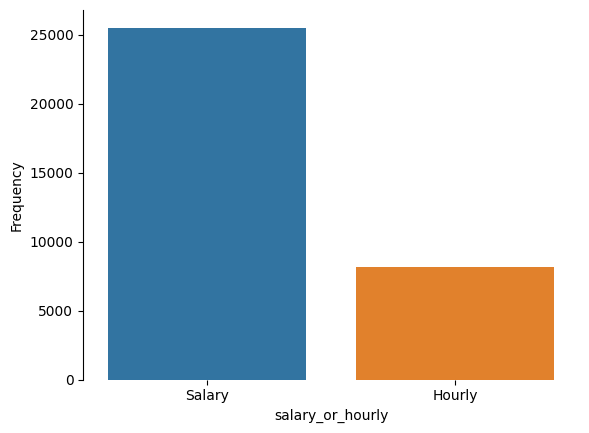

In [5]:
sns.countplot(x = 'salary_or_hourly', data=data)

# Changing graph style
sns.despine(bottom = True, left = False)
plt.ylabel('Frequency')
plt.show()

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

POLICE                 13848
FIRE                    4627
STREETS & SAN           2175
WATER MGMNT             1914
AVIATION                1856
OEMC                    1737
TRANSPORTN              1113
PUBLIC LIBRARY          1088
DAIS                    1033
FAMILY & SUPPORT         656
FINANCE                  544
HEALTH                   467
LAW                      398
CITY COUNCIL             362
BUILDINGS                258
PUBLIC SAFETY ADMIN      244
BUSINESS AFFAIRS         167
HOUSING & ECON DEV       154
COPA                     123
BOARD OF ELECTION        111
MAYOR'S OFFICE           104
INSPECTOR GEN             95
CITY CLERK                88
PROCUREMENT               84
HUMAN RESOURCES           75
ANIMAL CONTRL             75
CULTURAL AFFAIRS          74
HOUSING                   66
BUDGET & MGMT             44
ADMIN HEARNG              38
DISABILITIES              28
TREASURER                 28
HUMAN RELATIONS           17
BOARD OF ETHICS            8
POLICE BOARD  

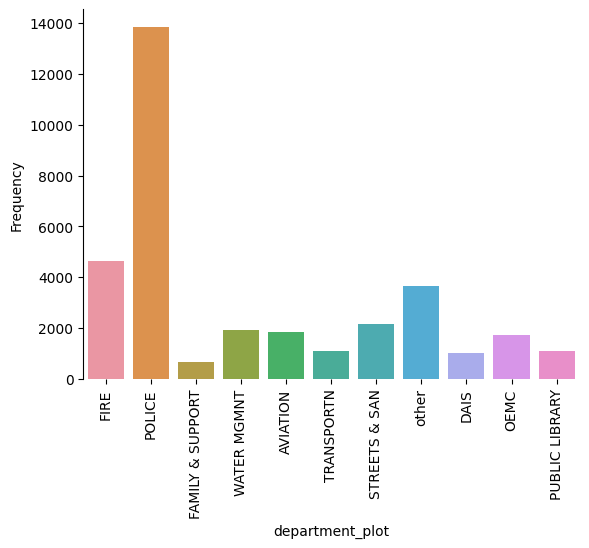

In [7]:
display(data['department'].value_counts())

# For the plot there are too many categories so I take the 10 biggest
# and leave everything else in a category called 'other'
top = data['department'].value_counts().index[0:10]
data['department_plot'] = np.where(data['department'].isin(top),data['department'],'other')
sns.countplot(x = 'department_plot', data=data)

# Changing graph style
sns.despine(bottom = True, left = False)
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [33]:
# data
hypo = 30
data_c2 = data[data['salary_or_hourly']=='Hourly']['hourly_rate']

# testing hypothesis
stat, pval = ttest_1samp(data_c2, hypo)
print('Our sample mean is %.2f$30/hr.' %data_c2.mean())
print('pvalue for the two-tailed test is %.2E.' %pval)
print('Our hypothesis %.2f$/hr is %.2f$/hr away from the sample mean.' %(hypo,scipy.stats.sem(data_c2)*stat))

print('\nThe p-value is 3.8E-202<<0.05 so we can assure that the hypothesis is wrong (the hypothesis was that the mean hourly wage was significantly different from $30/hr).')

Our sample mean is 34.59$30/hr.
pvalue for the two-tailed test is 3.83E-202.
Our hypothesis 30.00$/hr is 4.59$/hr away from the sample mean.

The p-value is 3.8E-202<<0.05 so we can assure that the hypothesis is wrong (the hypothesis was that the mean hourly wage was significantly different from $30/hr).


We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [32]:
# ONE SIDED TEST:
hypo = 86000
police_c2 = data[(data['department']=='POLICE')&(data['salary_or_hourly']=='Salary')]['annual_salary']

stat, pval = ttest_1samp(police_c2, hypo,alternative='greater')
# By setting alternative = 'greater' I think I'm telling the function
# that this is a one side test, and that H1 = 'Greater', so H0 = 'Equal or less'
print('stat is %.2f.' %stat)
print('Our sample mean is %.2f$/year.' %police_c2.mean())
print('pvalue for the two-tailed test is %.2E.' %pval)
print('Our hypothesis %.2f$/year is %.2f$/year under the sample mean.' %(hypo,scipy.stats.sem(police_c2)*stat))

print('\nAnd so our small p-value is telling us that H0 is surely not true. So the chief of police was not lying.')

stat is 18.52.
Our sample mean is 88834.12$/year.
pvalue for the two-tailed test is 6.12E-76.
Our hypothesis 86000.00$/year is 2834.12$/year under the sample mean.

And so our small p-value is telling us that H0 is surely not true. So the chief of police was not lying.


Using the `crosstab` function, find the department that has the most hourly workers. 

In [34]:
pd.crosstab(data['department'],data['salary_or_hourly']).sort_values(by='Hourly',ascending=False)

salary_or_hourly,Hourly,Salary
department,,
STREETS & SAN,1846,329
WATER MGMNT,1558,356
AVIATION,1214,642
OEMC,1077,660
DAIS,745,288
TRANSPORTN,726,387
FAMILY & SUPPORT,357,299
PUBLIC LIBRARY,356,732
CITY COUNCIL,74,288


The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [47]:
# ONE SIDED TEST:
depart = pd.crosstab(data['department'],data['salary_or_hourly']).sort_values(by='Hourly',ascending=False).index[0]
a = 0.05
hypo = 35
depart_data = data[(data['department']==depart)&(data['salary_or_hourly']=='Hourly')]['hourly_rate']

stat, pval = ttest_1samp(depart_data, hypo,alternative='less')
# H1 = 'Less', so H0 = 'Equal or greater'
print('stat is %.2f.' %stat)
print('Our sample mean is %.2f$/year.' %depart_data.mean())
print('pvalue for the two-tailed test is %.5f' %pval)
print('Our hypothesis %.2f$/hr is %.2f$/hr under the sample mean.' %(hypo,scipy.stats.sem(depart_data)*stat))

print('\nOur huge p-value indicates that H0 is true with an 99.99% confidence,so the complain statement is probably false.')

stat is 4.00.
Our sample mean is 35.55$/year.
pvalue for the two-tailed test is 0.99997
Our hypothesis 35.00$/hr is 0.55$/hr under the sample mean.

Our huge p-value indicates that H0 is true with an 99.99% confidence,so the complain statement is probably false.


# Challenge 3: To practice - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [50]:
data_c3 = data[(data['salary_or_hourly']=='Hourly')]['hourly_rate']

confidence_level = 0.95
degrees_freedom = len(data_c3) - 1
sample_mean = np.mean(data_c3)

sample_standard_error = scipy.stats.sem(data_c3) 

confidence_interval = scipy.stats.t.interval(confidence_level,  degrees_freedom,sample_mean,sample_standard_error)
print('We have a %.1f%% confidence that the population mean hourly rate lies between %.2f and %.2f.' %(confidence_level*100,confidence_interval[0],confidence_interval[1]))

We have a 95.0% confidence that the population mean hourly rate lies between 34.30 and 34.87.


Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [51]:
data_c3 = data[(data['department']=='POLICE')&(data['salary_or_hourly']=='Salary')]['annual_salary']

confidence_level = 0.95
degrees_freedom = len(data_c3) - 1
sample_mean = np.mean(data_c3)

sample_standard_error = scipy.stats.sem(data_c3) 

confidence_interval = scipy.stats.t.interval(confidence_level,  degrees_freedom,sample_mean,sample_standard_error)
print('We have a %.1f%% confidence that the population mean annual salary for police employees lies between %.2f and %.2f.' %(confidence_level*100,confidence_interval[0],confidence_interval[1]))

We have a 95.0% confidence that the population mean annual salary for police employees lies between 88534.12 and 89134.12.


# Bonus Challenge - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [ ]:
# in progress :(